# Projeto Predição socieconomica

Após entendimento de dados se iniciará a etapa de dataprep onde seráfeita analise e resolução dos problemas listados abaixo.

- tratamento de nulos

- normalização dos dados

In [42]:
import ClassesAnalise as CA

In [43]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [44]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [45]:
df = pd.read_csv('SARESP_train.csv')

C:\Users\lucia\AppData\Local\Temp\ipykernel_34116\652475977.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SARESP_train.csv')


In [38]:
df

,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,MUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,NEC_ESP_1,NEC_ESP_2,NEC_ESP_3,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,JULIO FORTES,B,E,E,E,E,E,E,E,B,A,A,A,A,A,A,B,A,B,B,B,B,A,A,A,A,A,C,C,B,B,B,C,A,B,C,C,C,C,C,C,C,A,C,C,C,C,C,C,C,B,C,B,B,B,B,A,D,C,C,D,C,A,D,Região Metropolitana do Vale do Paraíba e Lito...,GUARATINGUETA,414,LAVRINHAS,901489,EM-3ª série,A,F,11/15/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,41.7,20.8,20.8,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
1,30756614,MESSIAS FREIRE PROFESSOR,B,D,E,C,E,E,E,E,A,A,A,A,A,A,A,B,B,C,C,B,B,A,D,A,D,C,C,C,C,B,B,D,A,A,B,C,C,B,C,B,C,A,C,C,C,B,B,B,C,B,B,B,B,A,A,A,C,C,C,C,C,C,B,Região Metropolitana de São Paulo,SUL 1,100,SAO PAULO,37461,5º Ano EF,A,M,6/7/2010,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,83.3,100.0,66.7,Adequado,Avançado,Adequado
2,26014872,JOSE CONTI,B,E,B,D,E,B,D,C,A,A,A,A,B,A,B,C,B,B,A,A,A,A,A,A,A,D,C,B,A,A,B,B,A,B,B,C,B,C,C,C,B,A,B,B,C,C,B,B,C,D,C,C,B,C,B,A,E,B,C,B,D,C,C,Interior,JAU,348,IGARACU DO TIETE,25963,9º Ano EF,A,F,12/10/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,58.3,37.5,54.2,Básico,Básico,Básico
3,25739025,NAPOLEAO DE CARVALHO FREIRE PROFESSOR,B,D,E,D,C,E,D,D,A,A,B,B,C,B,B,C,B,B,A,B,A,B,B,A,B,D,B,A,B,A,B,B,B,B,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,B,B,D,C,A,A,A,E,C,C,B,C,B,C,Região Metropolitana de São Paulo,CENTRO OESTE,100,SAO PAULO,3924,EM-3ª série,B,M,10/3/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,29.2,29.2,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
4,27363009,RESIDENCIAL BORDON,B,D,E,E,E,E,E,C,A,A,A,A,C,A,B,C,B,B,A,B,A,A,B,A,B,C,C,A,C,B,B,B,B,A,C,C,B,C,C,C,C,A,C,B,C,C,B,B,B,B,B,B,B,B,B,A,E,B,C,A,D,A,D,Região Metropolitana de Campinas,SUMARE,671,SUMARE,576670,9º Ano EF,D,F,4/6/2007,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,79.2,41.7,50.0,Adequado,Abaixo do Básico,Básico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120591,28799794,ENNIO CHIESA PROFESSOR,A,E,E,E,E,E,E,E,A,B,A,A,A,A,A,C,A,A,A,A,A,A,A,A,A,B,C,C,B,C,C,B,B,B,C,C,C,C,C,C,C,B,C,C,B,D,C,A,D,C,C,B,B,B,A,A,E,C,C,B,C,A,C,Região Metropolitana de São Paulo,GUARULHOS SUL,336,GUARULHOS,5782,9º Ano EF,B,F,3/26/2006,TARDE,NaN,NaN,NaN,NaN,NaN,C,0,79.2,66.7,83.3,Adequado,Básico,Adequado
120592,27825068,HELIO HELENE,B,D,D,D,D,D,D,D,A,B,B,A,C,A,B,B,A,A,C,A,A,A,A,B,B,B,C,A,C,B,C,C,B,B,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,B,C,C,B,A,B,A,D,B,B,C,C,A,C,Região Metropolitana de São Paulo,LESTE 2,100,SAO PAULO,283885,5º Ano EF,D,M,5/13/2009,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,37.5,25.0,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
120593,23873470,ALBERTO SANTOS DUMONT,A,E,E,E,E,E,D,D,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,C,C,B,B,B,C,C,A,B,C,C,C,C,C,C,C,B,C,D,D,D,D,D,D,B,C,C,C,B,B,B,C,B,C,B,A,C,C,Região Metropolitana de Ribeirão Preto,RIBEIRAO PRETO,582,RIBEIRAO PRETO,23851,EM-3ª série,C,F,4/9/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,50.0,37.5,41.7,Básico,Abaixo do Básico,Abaixo do Básico
120594,31376275,FRANCISCO BONFIM,B,E,C,C,D,B,B,A,A,A,B,C,B,B,B,A,B,A,B,C,B,B,A,A,D,A,A,B,C,C,C,A,C,B,B,B,B,B,C,A,B,C,B,B,B,C,C,D,C,C,C,E,D,D,E,E,D,C,C,B,A,A,A,Região Metropolitana de Ribeirão Preto,RIBEIRAO PRETO,582,RIBEIRAO PRETO,23966,5º Ano EF,E,F,9/1/2010,TARDE,FISICA-OUTROS,NaN,NaN,NaN,NaN,C,1,45.8,70.8,54.2,Abaixo do Básico,Básico,Abaixo do Básico


In [83]:
df.head()


,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,MUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,1600,1,4,4,4,4,4,4,4,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,2,2,1,1,1,2,0,1,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,1,2,1,1,1,1,0,3,2,2,3,2,0,3,6,8,414,163,901489,2,26,0,613,0,1,0,41.7,20.8,20.8,0,0,0
1,30756614,1980,1,3,4,2,4,4,4,4,0,0,0,0,0,0,0,1,1,2,2,1,1,0,3,0,3,2,2,2,2,1,1,3,0,0,1,2,2,1,2,1,2,0,2,2,2,1,1,1,2,1,1,1,1,0,0,0,2,2,2,2,2,2,1,5,56,100,301,37461,0,26,1,2521,0,1,0,83.3,100.0,66.7,1,2,1
2,26014872,1468,1,4,1,3,4,1,3,2,0,0,0,0,1,0,1,2,1,1,0,0,0,0,0,0,0,3,2,1,0,0,1,1,0,1,1,2,1,2,2,2,1,0,1,1,2,2,1,1,2,3,2,2,1,2,1,0,4,1,2,1,3,2,2,0,18,348,126,25963,1,26,0,836,0,1,0,58.3,37.5,54.2,3,3,3
3,25739025,2035,1,3,4,3,2,4,3,3,0,0,1,1,2,1,1,2,1,1,0,1,0,1,1,0,1,3,1,0,1,0,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,2,0,0,0,4,2,2,1,2,1,2,5,4,100,301,3924,2,35,1,476,0,1,0,29.2,29.2,16.7,0,0,0
4,27363009,2388,1,3,4,4,4,4,4,2,0,0,0,0,2,0,1,2,1,1,0,1,0,0,1,0,1,2,2,0,2,1,1,1,1,0,2,2,1,2,2,2,2,0,2,1,2,2,1,1,1,1,1,1,1,1,1,0,4,1,2,0,3,0,3,2,59,671,315,576670,1,44,0,1903,0,1,0,79.2,41.7,50.0,1,0,3


In [18]:
df.dtypes


CD_ALUNO                 int64
NOMESC                  object
Q1                      object
Q2                      object
Q3                      object
Q4                      object
Q5                      object
Q6                      object
Q7                      object
Q8                      object
Q9                      object
Q10                     object
Q11                     object
Q12                     object
Q13                     object
Q14                     object
Q15                     object
Q16                     object
Q17                     object
Q18                     object
Q19                     object
Q20                     object
Q21                     object
Q22                     object
Q23                     object
Q24                     object
Q25                     object
Q26                     object
Q27                     object
Q28                     object
Q29                     object
Q30                     object
Q31     

In [60]:
df.isna().sum().sort_values()

CD_ALUNO               0
Q58                    0
Q57                    0
Q56                    0
Q55                    0
Q54                    0
Q53                    0
Q52                    0
Q51                    0
Q50                    0
Q49                    0
Q48                    0
Q47                    0
Q46                    0
Q45                    0
Q44                    0
Q43                    0
Q42                    0
Q59                    0
Q41                    0
Q60                    0
Q62                    0
nivel_profic_lp        0
porc_ACERT_CIE         0
porc_ACERT_MAT         0
porc_ACERT_lp          0
Tem_Nec                0
Tipo_PROVA             0
PERIODO                0
DT_NASCIMENTO          0
TP_SEXO                0
TURMA                  0
SERIE_ANO              0
CODESC                 0
MUN                    0
CODMUN                 0
DE                     0
RegiaoMetropolitana    0
Q63                    0
Q61                    0


In [59]:
df = df.dropna(axis=1, thresh=int(len(df)/10), how="Any")

In [57]:
(len(df)/10)

12059.6

In [61]:
df = CA.typeEncoder(df,'object')

C:\Users\lucia\Desktop\Desenvolvimento\ImplementacoesReais\testScores by socialeconimcs\assignment02\assignment02\ClassesAnalise.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i] = le.fit_transform(df.iloc[:,i])


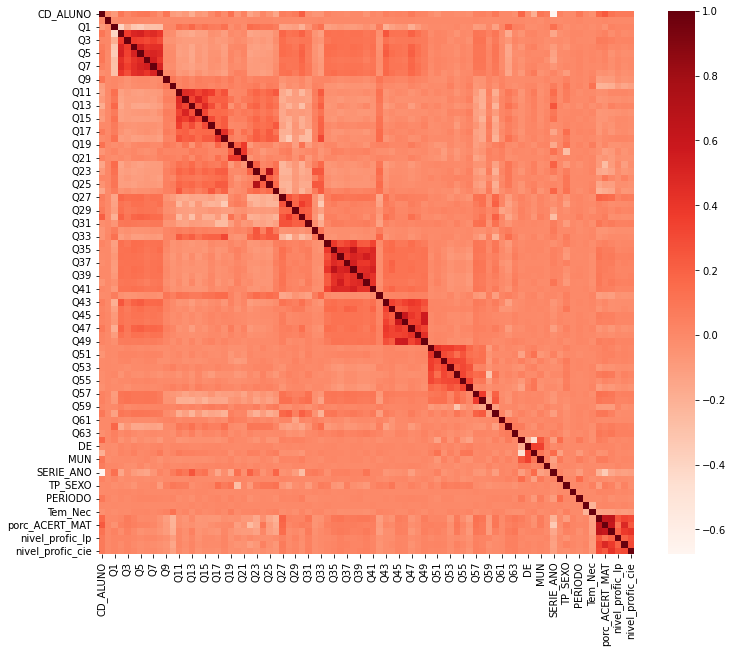

In [45]:
from matplotlib import pyplot


plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,  cmap=plt.cm.Reds)
plt.show() 

In [62]:
df.dtypes

CD_ALUNO                 int64
NOMESC                   int32
Q1                       int32
Q2                       int32
Q3                       int32
Q4                       int32
Q5                       int32
Q6                       int32
Q7                       int32
Q8                       int32
Q9                       int32
Q10                      int32
Q11                      int32
Q12                      int32
Q13                      int32
Q14                      int32
Q15                      int32
Q16                      int32
Q17                      int32
Q18                      int32
Q19                      int32
Q20                      int32
Q21                      int32
Q22                      int32
Q23                      int32
Q24                      int32
Q25                      int32
Q26                      int32
Q27                      int32
Q28                      int32
Q29                      int32
Q30                      int32
Q31     

In [63]:
#retirada de variaveis futuras, que são resposta.(Só deixar a que for prever)

dataTrain = df.drop(['porc_ACERT_lp'],axis=1)
#dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)


In [64]:
#remocao de variaveis de identificação sistemica

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)


In [71]:
CA.relevantFeatures(dataTrain,'porc_ACERT_MAT',-1)

Q1                     0.043217
Q2                     0.042609
Q3                     0.066398
Q4                     0.046745
Q5                     0.025097
Q6                     0.024728
Q7                     0.006261
Q8                     0.039520
Q9                     0.093148
Q10                    0.207009
Q11                    0.025848
Q12                    0.049975
Q13                    0.037965
Q14                    0.062742
Q15                    0.065916
Q16                    0.031792
Q17                    0.014524
Q18                    0.000310
Q19                    0.007255
Q20                    0.107342
Q21                    0.057092
Q22                    0.260933
Q23                    0.173014
Q24                    0.092353
Q25                    0.096263
Q26                    0.178452
Q27                    0.170788
Q28                    0.006901
Q29                    0.034696
Q30                    0.061024
Q31                    0.046792
Q32     

In [72]:
cor = dataTrain.corr()
abs(cor['porc_ACERT_MAT'])


Q1                     0.043217
Q2                     0.042609
Q3                     0.066398
Q4                     0.046745
Q5                     0.025097
Q6                     0.024728
Q7                     0.006261
Q8                     0.039520
Q9                     0.093148
Q10                    0.207009
Q11                    0.025848
Q12                    0.049975
Q13                    0.037965
Q14                    0.062742
Q15                    0.065916
Q16                    0.031792
Q17                    0.014524
Q18                    0.000310
Q19                    0.007255
Q20                    0.107342
Q21                    0.057092
Q22                    0.260933
Q23                    0.173014
Q24                    0.092353
Q25                    0.096263
Q26                    0.178452
Q27                    0.170788
Q28                    0.006901
Q29                    0.034696
Q30                    0.061024
Q31                    0.046792
Q32     

In [69]:
dataTrain.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,Tipo_PROVA,Tem_Nec,porc_ACERT_MAT
0,1,4,4,4,4,4,4,4,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,2,2,1,1,1,2,0,1,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,1,2,1,1,1,1,0,3,2,2,3,2,0,3,6,8,414,901489,2,26,0,613,0,1,0,20.8
1,1,3,4,2,4,4,4,4,0,0,0,0,0,0,0,1,1,2,2,1,1,0,3,0,3,2,2,2,2,1,1,3,0,0,1,2,2,1,2,1,2,0,2,2,2,1,1,1,2,1,1,1,1,0,0,0,2,2,2,2,2,2,1,5,56,100,37461,0,26,1,2521,0,1,0,100.0
2,1,4,1,3,4,1,3,2,0,0,0,0,1,0,1,2,1,1,0,0,0,0,0,0,0,3,2,1,0,0,1,1,0,1,1,2,1,2,2,2,1,0,1,1,2,2,1,1,2,3,2,2,1,2,1,0,4,1,2,1,3,2,2,0,18,348,25963,1,26,0,836,0,1,0,37.5
3,1,3,4,3,2,4,3,3,0,0,1,1,2,1,1,2,1,1,0,1,0,1,1,0,1,3,1,0,1,0,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,2,0,0,0,4,2,2,1,2,1,2,5,4,100,3924,2,35,1,476,0,1,0,29.2
4,1,3,4,4,4,4,4,2,0,0,0,0,2,0,1,2,1,1,0,1,0,0,1,0,1,2,2,0,2,1,1,1,1,0,2,2,1,2,2,2,2,0,2,1,2,2,1,1,1,1,1,1,1,1,1,0,4,1,2,0,3,0,3,2,59,671,576670,1,44,0,1903,0,1,0,41.7


In [75]:
x = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
y = dataTrain['porc_ACERT_MAT']

In [76]:
from sklearn.model_selection import train_test_split


x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
param_grid = {'n_estimators':[1,10,100,200],
                'max_depth': [5,10,15],
                'min_samples_split':[2,3,5,8]}

score = scoring=['neg_mean_squared_error','r2']

grid_cv = RandomizedSearchCV(model,param_grid,scoring=score,cv=10,verbose=3,refit='neg_mean_squared_error')

grid_cv.fit(x_train,y_train)
print("R2::{}".format(grid_cv.best_score_))
print("hiperparametro melhor::{}".format(grid_cv.best_params_))

pd.DataFrame(data = grid_cv.cv_results_).head(3)

best_model = grid_cv.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END max_depth=5, min_samples_split=3, n_estimators=1; neg_mean_squared_error: (test=-358.849) r2: (test=0.221) total time=   0.2s
[CV 2/10] END max_depth=5, min_samples_split=3, n_estimators=1; neg_mean_squared_error: (test=-356.659) r2: (test=0.207) total time=   0.2s
[CV 3/10] END max_depth=5, min_samples_split=3, n_estimators=1; neg_mean_squared_error: (test=-361.036) r2: (test=0.201) total time=   0.3s
[CV 4/10] END max_depth=5, min_samples_split=3, n_estimators=1; neg_mean_squared_error: (test=-351.688) r2: (test=0.213) total time=   0.2s
[CV 5/10] END max_depth=5, min_samples_split=3, n_estimators=1; neg_mean_squared_error: (test=-346.098) r2: (test=0.228) total time=   0.2s
[CV 6/10] END max_depth=5, min_samples_split=3, n_estimators=1; neg_mean_squared_error: (test=-359.837) r2: (test=0.214) total time=   0.2s
[CV 7/10] END max_depth=5, min_samples_split=3, n_estimators=1; neg_mean_squared_error: (test=-34

[CV 9/10] END max_depth=5, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-352.909) r2: (test=0.223) total time=  24.8s
[CV 10/10] END max_depth=5, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-347.257) r2: (test=0.230) total time=  24.5s
[CV 1/10] END max_depth=5, min_samples_split=3, n_estimators=10; neg_mean_squared_error: (test=-353.807) r2: (test=0.232) total time=   2.4s
[CV 2/10] END max_depth=5, min_samples_split=3, n_estimators=10; neg_mean_squared_error: (test=-352.062) r2: (test=0.218) total time=   2.4s
[CV 3/10] END max_depth=5, min_samples_split=3, n_estimators=10; neg_mean_squared_error: (test=-356.232) r2: (test=0.212) total time=   2.4s
[CV 4/10] END max_depth=5, min_samples_split=3, n_estimators=10; neg_mean_squared_error: (test=-347.794) r2: (test=0.222) total time=   2.4s
[CV 5/10] END max_depth=5, min_samples_split=3, n_estimators=10; neg_mean_squared_error: (test=-343.292) r2: (test=0.234) total time=   2.4s
[CV 6/10] 

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

tree = DecisionTreeRegressor(criterion='mse')    

model = RandomForestRegressor(n_estimators=200,criterion='squared_error',max_depth=15, min_samples_split= 2,min_samples_leaf=2)
#model = GradientBoostingRegressor(loss='squared_error', learning_rate= 0.1 , n_estimators = 100)

model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=200)

In [99]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()   

model.fit(x_train, y_train)

LinearRegression()

In [118]:
pred = model.predict(x_test)

In [119]:
CA.regScore(model,x_test,y_test,pred)

R2:0.380
MSE:279.133
MAE:13.535


In [100]:
pred = model.predict(x_test)

In [101]:
CA.regScore(model,x_test,y_test,pred)

R2:0.305
MSE:313.239
MAE:14.469


Feature: 0, Score: 0.00740
Feature: 1, Score: 0.01955
Feature: 2, Score: 0.01092
Feature: 3, Score: 0.01002
Feature: 4, Score: 0.01157
Feature: 5, Score: 0.01519
Feature: 6, Score: 0.01466
Feature: 7, Score: 0.01143
Feature: 8, Score: 0.00951
Feature: 9, Score: 0.05723
Feature: 10, Score: 0.00671
Feature: 11, Score: 0.00362
Feature: 12, Score: 0.01271
Feature: 13, Score: 0.00412
Feature: 14, Score: 0.00480
Feature: 15, Score: 0.00653
Feature: 16, Score: 0.00485
Feature: 17, Score: 0.00685
Feature: 18, Score: 0.00517
Feature: 19, Score: 0.00757
Feature: 20, Score: 0.00508
Feature: 21, Score: 0.06313
Feature: 22, Score: 0.04131
Feature: 23, Score: 0.01090
Feature: 24, Score: 0.00635
Feature: 25, Score: 0.01639
Feature: 26, Score: 0.01161
Feature: 27, Score: 0.00742
Feature: 28, Score: 0.00667
Feature: 29, Score: 0.00955
Feature: 30, Score: 0.00607
Feature: 31, Score: 0.00859
Feature: 32, Score: 0.01164
Feature: 33, Score: 0.00261
Feature: 34, Score: 0.00508
Feature: 35, Score: 0.00296
Fe

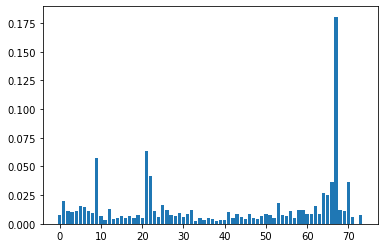

array([7.39906467e-03, 1.95507870e-02, 1.09239887e-02, 1.00167812e-02,
       1.15655669e-02, 1.51922258e-02, 1.46600569e-02, 1.14292550e-02,
       9.50512866e-03, 5.72316121e-02, 6.70583871e-03, 3.62470030e-03,
       1.27074541e-02, 4.11543592e-03, 4.79935369e-03, 6.53113637e-03,
       4.85396810e-03, 6.84604458e-03, 5.16876983e-03, 7.57164959e-03,
       5.08132033e-03, 6.31303811e-02, 4.13132585e-02, 1.09049067e-02,
       6.35422994e-03, 1.63873663e-02, 1.16056974e-02, 7.41605288e-03,
       6.67263377e-03, 9.55034407e-03, 6.06860931e-03, 8.59027083e-03,
       1.16382335e-02, 2.60940765e-03, 5.08178708e-03, 2.96282467e-03,
       5.11414309e-03, 4.07878223e-03, 2.59851419e-03, 3.41257704e-03,
       3.58198920e-03, 1.05234502e-02, 5.07825430e-03, 8.12908259e-03,
       5.93908560e-03, 4.32599272e-03, 8.23499401e-03, 5.10203570e-03,
       4.44830270e-03, 6.54847813e-03, 8.70195143e-03, 7.73426534e-03,
       4.79446116e-03, 1.81230285e-02, 7.93214768e-03, 7.17780066e-03,
      

In [82]:
CA.importance(model)

Primeiro experimento - teste de correlações - remoção de variaveis sistemicas e com muitos nulos
resultados não muito satisfatorios, mastalvez ainda de para selecionar perguntas melhores ou excluir alguma questões para melhorar a resolução.
ainda é possivel remover features correlacionadas entre si.
adaptar perguntas com pesos para direcionar melhor as predições.

In [102]:
corr_matrix = x.corr().abs()

In [120]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(dtype=bool))

print(upper)

                     Q1        Q2        Q3        Q4        Q5        Q6        Q7        Q8        Q9       Q10       Q11       Q12       Q13       Q14       Q15       Q16       Q17       Q18       Q19       Q20       Q21       Q22       Q23       Q24       Q25       Q26       Q27       Q28       Q29       Q30       Q31       Q32       Q33       Q34       Q35       Q36       Q37       Q38       Q39       Q40       Q41       Q42       Q43       Q44       Q45       Q46       Q47       Q48       Q49       Q50       Q51       Q52       Q53       Q54       Q55       Q56       Q57       Q58       Q59       Q60       Q61       Q62       Q63  RegiaoMetropolitana        DE    CODMUN    CODESC  SERIE_ANO     TURMA   TP_SEXO  DT_NASCIMENTO   PERIODO  Tipo_PROVA   Tem_Nec
Q1                  NaN  0.403625  0.191798  0.322612  0.349876  0.277510  0.284207  0.278244  0.005948  0.006789  0.130182  0.093170  0.168472  0.076266  0.119457  0.073097  0.061631  0.126994  0.025241  0.025695  0.015774  0.

In [122]:
def corrMatrix(df):
    corr_matrix = df.corr().abs()
    return corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(dtype=bool))
    
corrMatrix(x)

,Q1,Q2,Q3,Q6,Q9,Q10,Q11,Q12,Q13,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q39,Q42,Q43,Q44,Q45,Q47,Q48,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,Tipo_PROVA,Tem_Nec
Q1,NaN,0.403625,0.191798,0.277510,0.005948,0.006789,0.130182,0.093170,0.168472,0.119457,0.073097,0.061631,0.126994,0.025241,0.025695,0.015774,0.148649,0.126374,0.101548,0.068452,0.143392,0.127349,0.110082,0.203685,0.066846,0.060096,0.128669,0.119004,0.098954,0.069746,0.088468,0.077383,0.060571,0.197091,0.125055,0.081016,0.188039,0.096706,0.002426,0.004399,0.011975,0.002266,0.009630,0.018178,0.010142,0.095684,0.083281,0.000503,0.122087,0.014634,0.178668,0.048783,0.032596,0.021586,0.019961,0.007386,0.129103,0.023070,0.025834,0.001668,0.013757,0.000696,0.018254
Q2,NaN,NaN,0.371684,0.431469,0.009374,0.024735,0.125230,0.138111,0.165351,0.114131,0.038037,0.054545,0.105083,0.007046,0.026538,0.002218,0.145180,0.124504,0.113317,0.045867,0.174745,0.112806,0.132543,0.198140,0.086310,0.056060,0.107772,0.129686,0.119357,0.122846,0.110205,0.126547,0.036742,0.251133,0.118941,0.112800,0.199389,0.123393,0.009814,0.027175,0.011413,0.009927,0.053469,0.003585,0.012831,0.104567,0.093092,0.038415,0.101497,0.012922,0.177834,0.006549,0.048618,0.019626,0.025785,0.002517,0.151999,0.030742,0.010846,0.005264,0.007035,0.006943,0.006332
Q3,NaN,NaN,NaN,0.305857,0.045774,0.048664,0.084832,0.100060,0.096773,0.098942,0.055412,0.087750,0.086059,0.041848,0.012790,0.028724,0.076570,0.101489,0.080014,0.016247,0.140196,0.085369,0.077002,0.101543,0.098999,0.035002,0.067362,0.094402,0.123185,0.117114,0.121900,0.110279,0.055943,0.117738,0.075475,0.088884,0.090500,0.080168,0.010315,0.026707,0.018214,0.022157,0.002607,0.001028,0.039814,0.112219,0.111360,0.003213,0.082580,0.017262,0.071843,0.018728,0.009193,0.001110,0.010235,0.022040,0.020943,0.008852,0.022131,0.008628,0.003062,0.003770,0.011028
Q6,NaN,NaN,NaN,NaN,0.001954,0.010875,0.098527,0.091449,0.146493,0.102935,0.046704,0.039743,0.093081,0.014887,0.035937,0.001623,0.105065,0.093813,0.081983,0.035242,0.106954,0.108038,0.103607,0.178673,0.075511,0.042367,0.090761,0.112495,0.102261,0.085244,0.093559,0.091506,0.027895,0.166590,0.103046,0.093180,0.169260,0.098808,0.001599,0.024512,0.013599,0.001710,0.011280,0.020190,0.000785,0.107486,0.108202,0.010878,0.100175,0.009891,0.136458,0.014048,0.044815,0.003894,0.009946,0.038199,0.143353,0.020630,0.008109,0.000775,0.018790,0.005051,0.014817
Q9,NaN,NaN,NaN,NaN,NaN,0.083377,0.021712,0.056427,0.006354,0.037273,0.041752,0.066240,0.026865,0.079569,0.011703,0.054642,0.010035,0.040439,0.032138,0.039427,0.050839,0.016270,0.024280,0.006231,0.059572,0.011198,0.022310,0.022077,0.001932,0.019740,0.013555,0.004055,0.100016,0.032012,0.031721,0.011348,0.053524,0.026063,0.016945,0.027838,0.029947,0.015746,0.024087,0.002972,0.023210,0.056629,0.053510,0.026011,0.015275,0.028482,0.008849,0.013338,0.010266,0.003465,0.007110,0.014316,0.010948,0.008141,0.039898,0.000032,0.009444,0.002911,0.034712
Q10,NaN,NaN,NaN,NaN,NaN,NaN,0.021069,0.054567,0.020933,0.045319,0.014977,0.042598,0.012987,0.056032,0.021545,0.041341,0.051497,0.078514,0.009252,0.052962,0.090739,0.019860,0.045945,0.000754,0.052339,0.031093,0.022140,0.048504,0.052793,0.070195,0.055714,0.053800,0.056201,0.004293,0.003222,0.021471,0.021020,0.001980,0.003786,0.013062,0.011755,0.043701,0.018203,0.000352,0.045095,0.070223,0.053527,0.014299,0.040860,0.034519,0.013220,0.033258,0.014891,0.015394,0.019859,0.003873,0.064106,0.004672,0.084337,0.000185,0.021669,0.015193,0.118544
Q11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467331,0.441869,0.411630,0.363117,0.184717,0.271684,0.004085,0.011034,0.019985,0.127930,0.186000,0.130560,0.233811,0.163648,0.235771,0.102742,0.244290,0.126449,0.061738,0.229851,0.030627,0.040340,0.020568,0.022807,0.031596,0.118436,0.058757,0.027477,0.000587,0.052481,0.023353,0.021066,0.006240,0.010327,0.001475,0.052385,0.010196,0.016691,0.09

In [109]:
# Find index of columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# drop the columns
x.drop(x.columns[to_drop], axis=1)

C:\Users\lucia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [108]:
xb = x

In [110]:
to_drop

['Q4', 'Q5', 'Q7', 'Q8', 'Q14', 'Q25', 'Q38', 'Q40', 'Q41', 'Q46', 'Q49']

In [115]:
for i in to_drop:
    x = CA.removerCol(x,i)
